In [ ]:
#Instalamos librería para análisis de variables categóricas
!pip install funpymodeling

In [222]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

from funpymodeling.exploratory import freq_tbl

In [182]:
#Cargar archivo csv desde equipo
#from google.colab import files
#files.upload()

In [223]:
#Carga desde un archivo .xlsx sin indice
dfprecios = pd.read_excel('DETALLE_DE_PRECIOS_LIMPIO.xlsx')

In [224]:
dfprecios.head()

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,1,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41


In [225]:
#Checar si hay valores nulos por columna
valores_nulos=dfprecios.isnull().sum().sum()
valores_nulos

0

In [226]:
dfprecios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1426 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [227]:
#filtro de columnas numericas
filtronumerico = dfprecios.select_dtypes(include=['float64', 'int64'])
filtronumerico.head(3)

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56


In [228]:
#filtro de columnas no numericas
filtro_no_numerico = dfprecios.select_dtypes(include=['object'])
filtro_no_numerico.head(3)

,CVE_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CVE_ART,DESCR
0,F37034,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V"
1,F37036,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT"
2,F37041,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT


## ***Realiza la estadística descriptiva de la base de datos. Medidas de tendencia central, dispersión, análisis de cuartiles e incorporación de elementos gráficos para mostrar los datos***


In [261]:
# Obtener las medidas de tendencia central
media = filtronumerico.mean()
mediana = filtronumerico.median()
moda = filtronumerico.mode()

# Obtener las medidas de dispersión
rango = filtronumerico.max() - filtronumerico.min()
desviacion_estandar = filtronumerico.std()
varianza = filtronumerico.var()

# Obtener los cuartiles
cuartiles = filtronumerico.quantile([0.25, 0.5, 0.75])

# Imprimir las medidas de tendencia central y dispersión
print("Medidas de tendencia central:")
print("\nMedia:\n", media)
print("\nMediana:\n", mediana)
print("\nModa:\n", moda)

print("\nMedidas de dispersión:")
print("\nRango:\n", rango)
print("\nDesviación estándar:\n", desviacion_estandar)
print("\nVarianza:\n", varianza)

# Imprimir los cuartiles
print("\nCuartiles:\n", cuartiles)

Medidas de tendencia central:

Media:
 CANT                            4.103787
PRECIO_UNITARIO              1517.383065
COSTO_UNITARIO                245.929642
COSTO_UNITARIO_CALCULADO      541.512398
SUBTOTAL_PARTIDA             4998.883387
COSTO_TOTAL_CALCULADO        1413.020589
MARGEN_UNITARIO_CALCULADO     975.870722
MARGEN_TOTAL_CALCULADO       3585.862910
dtype: float64

Mediana:
 CANT                            2.000
PRECIO_UNITARIO               825.000
COSTO_UNITARIO                 77.350
COSTO_UNITARIO_CALCULADO      195.345
SUBTOTAL_PARTIDA             2050.870
COSTO_TOTAL_CALCULADO         444.135
MARGEN_UNITARIO_CALCULADO     637.850
MARGEN_TOTAL_CALCULADO       1521.345
dtype: float64

Moda:
    CANT  PRECIO_UNITARIO  COSTO_UNITARIO  COSTO_UNITARIO_CALCULADO  \
0   1.0           1615.0             0.0                     220.0   
1   NaN              NaN             NaN                       NaN   

   SUBTOTAL_PARTIDA  COSTO_TOTAL_CALCULADO  MARGEN_UNITARIO_CALCULADO

### Gráficas: NOMBRE_VENDEDOR

In [245]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(filtro_no_numerico['NOMBRE_VENDEDOR'])
table1

,NOMBRE_VENDEDOR,frequency,percentage,cumulative_perc
0,LETICIA RAMIREZ HERNANDEZ,895,0.627630,0.627630
1,ALFREDO CANELA,335,0.234923,0.862553
2,DIEGO ARMANDO LEON DURAN,120,0.084151,0.946704
3,AARON NUÑO CORDOVA,72,0.050491,0.997195
4,ATENCION A CLIENTES,2,0.001403,0.998597
5,VENDEDOR ANONIMO,2,0.001403,1.000000


In [246]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['percentage']>0.05]
Filtro

,NOMBRE_VENDEDOR,frequency,percentage,cumulative_perc
0,LETICIA RAMIREZ HERNANDEZ,895,0.627630,0.627630
1,ALFREDO CANELA,335,0.234923,0.862553
2,DIEGO ARMANDO LEON DURAN,120,0.084151,0.946704
3,AARON NUÑO CORDOVA,72,0.050491,0.997195


In [247]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('NOMBRE_VENDEDOR')
Filtro_index

,frequency,percentage,cumulative_perc
NOMBRE_VENDEDOR,,,
LETICIA RAMIREZ HERNANDEZ,895,0.627630,0.627630
ALFREDO CANELA,335,0.234923,0.862553
DIEGO ARMANDO LEON DURAN,120,0.084151,0.946704
AARON NUÑO CORDOVA,72,0.050491,0.997195


Text(0, 0.5, 'Frecuencia')

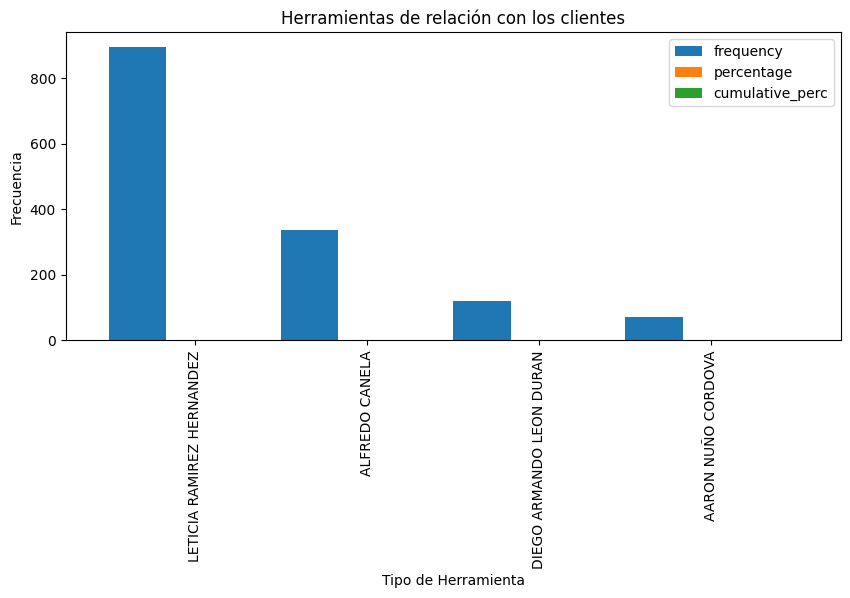

In [248]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

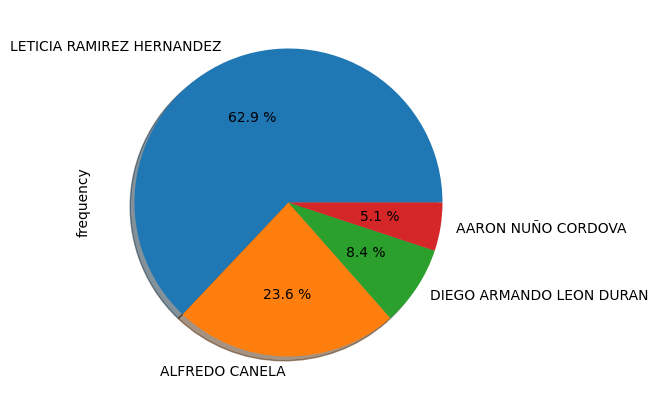

In [249]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

En la columna NOMBRE_VENDEDOR se observa que existen 4 vendedores principales que venden minimo el 5% de las ventas cada uno. El vendedor principal es LETICIA RAMIREZ HERNANDEZ con el 62.9% del total, seguida por ALFREDO CANELA con el 23.6%.

### Gráficas: NOMBRE_CLIENTE

In [256]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(filtro_no_numerico['NOMBRE_CLIENTE'])
table1

,NOMBRE_CLIENTE,frequency,percentage,cumulative_perc
0,PÚBLICO EN GENERAL,94,0.065919,0.065919
1,PROVEEDORA DE SEGURIDAD INDUSTRIAL DEL GOLFO,41,0.028752,0.094670
2,CEREALES Y PASTAS,27,0.018934,0.113604
3,DEACERO,26,0.018233,0.131837
4,FIDEICOMISO F/1596,25,0.017532,0.149369
...,...,...,...,...
486,MARIANA HERRERA DE LA ROSA,1,0.000701,0.997195
487,GUSTAVO BARRON ZUÑIGA,1,0.000701,0.997896
488,PACHECO HERNANDEZ MARIA ELVIRA,1,0.000701,0.998597
489,SISTEMAS AVANZADOS EN COMPUTACION DE MEXICO,1,0.000701,0.999299


In [257]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['percentage']>0.01]
Filtro

,NOMBRE_CLIENTE,frequency,percentage,cumulative_perc
0,PÚBLICO EN GENERAL,94,0.065919,0.065919
1,PROVEEDORA DE SEGURIDAD INDUSTRIAL DEL GOLFO,41,0.028752,0.094670
2,CEREALES Y PASTAS,27,0.018934,0.113604
3,DEACERO,26,0.018233,0.131837
4,FIDEICOMISO F/1596,25,0.017532,0.149369
5,ANA BARBARA CRUZ PALACIOS,23,0.016129,0.165498
6,DESECHOS INDUSTRIALES CONIN,23,0.016129,0.181627
7,ERIKA YUSSEL BLANCO CORTEZ,18,0.012623,0.194250
8,TE.MEX AUTOMOTIVE,17,0.011921,0.206171
9,VICTOR HUGO CASTELLANOS NUÑEZ,17,0.011921,0.218093


In [258]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('NOMBRE_CLIENTE')
Filtro_index

,frequency,percentage,cumulative_perc
NOMBRE_CLIENTE,,,
PÚBLICO EN GENERAL,94,0.065919,0.065919
PROVEEDORA DE SEGURIDAD INDUSTRIAL DEL GOLFO,41,0.028752,0.094670
CEREALES Y PASTAS,27,0.018934,0.113604
DEACERO,26,0.018233,0.131837
FIDEICOMISO F/1596,25,0.017532,0.149369
ANA BARBARA CRUZ PALACIOS,23,0.016129,0.165498
DESECHOS INDUSTRIALES CONIN,23,0.016129,0.181627
ERIKA YUSSEL BLANCO CORTEZ,18,0.012623,0.194250
TE.MEX AUTOMOTIVE,17,0.011921,0.206171


Text(0, 0.5, 'Frecuencia')

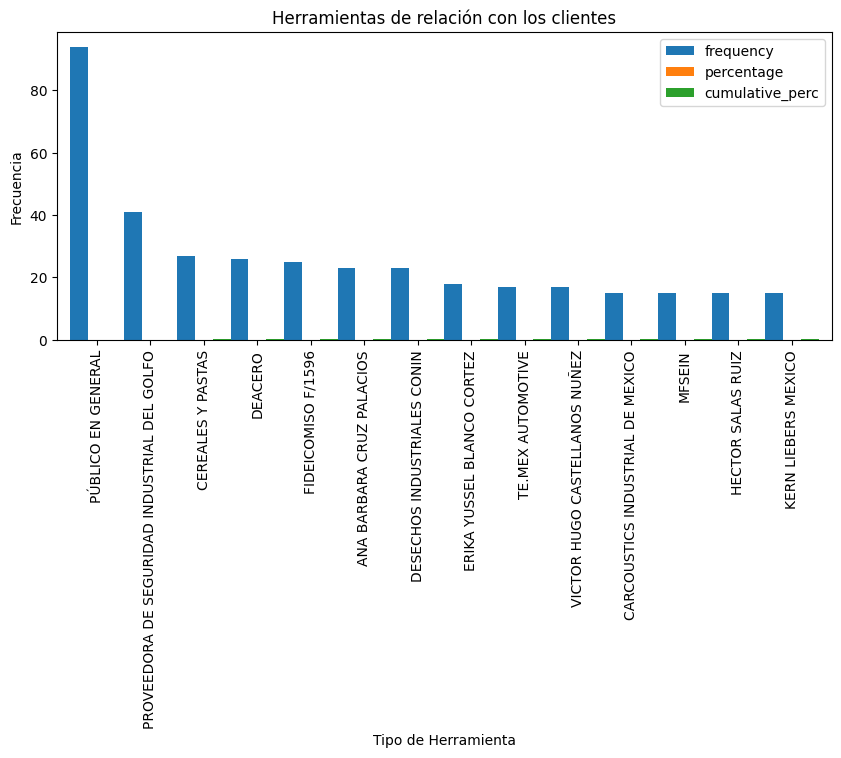

In [259]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

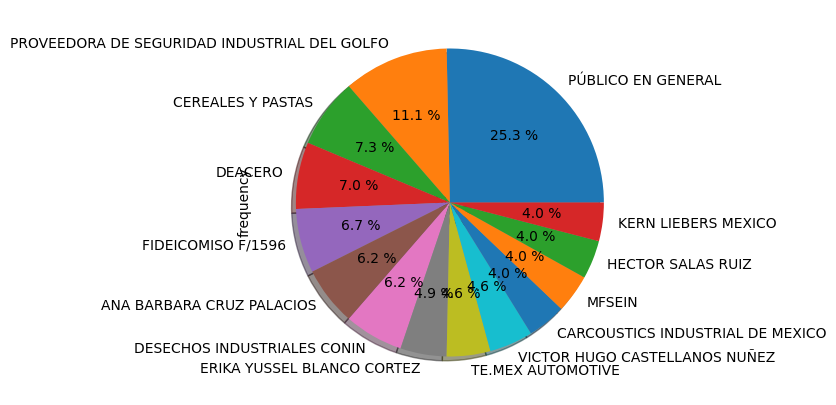

In [260]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

En la columna NOMBRE_CLIENTE se observa que PÚBLICO EN GENERAL es la categoria más frecuente con mas del 25% de los registros. Seguida por los 3 clientes más grandes: PROVEEDORA DE SEGURIDAD INDUSTRIAL DEL GOLFO con el 11.1%, CEREALES Y PASTAS con el 7.3% y DE ACERO con el 7%. Cabe mencionar que la gráfica solo muestra clientes cuyas compras sean mayores al 1% del total para filtrar clientes muy pequeños en la visualización.

## ***Determina el conjunto de puntos (de filas y columnas) que establezcan el universo de datos apto para la modelación.***

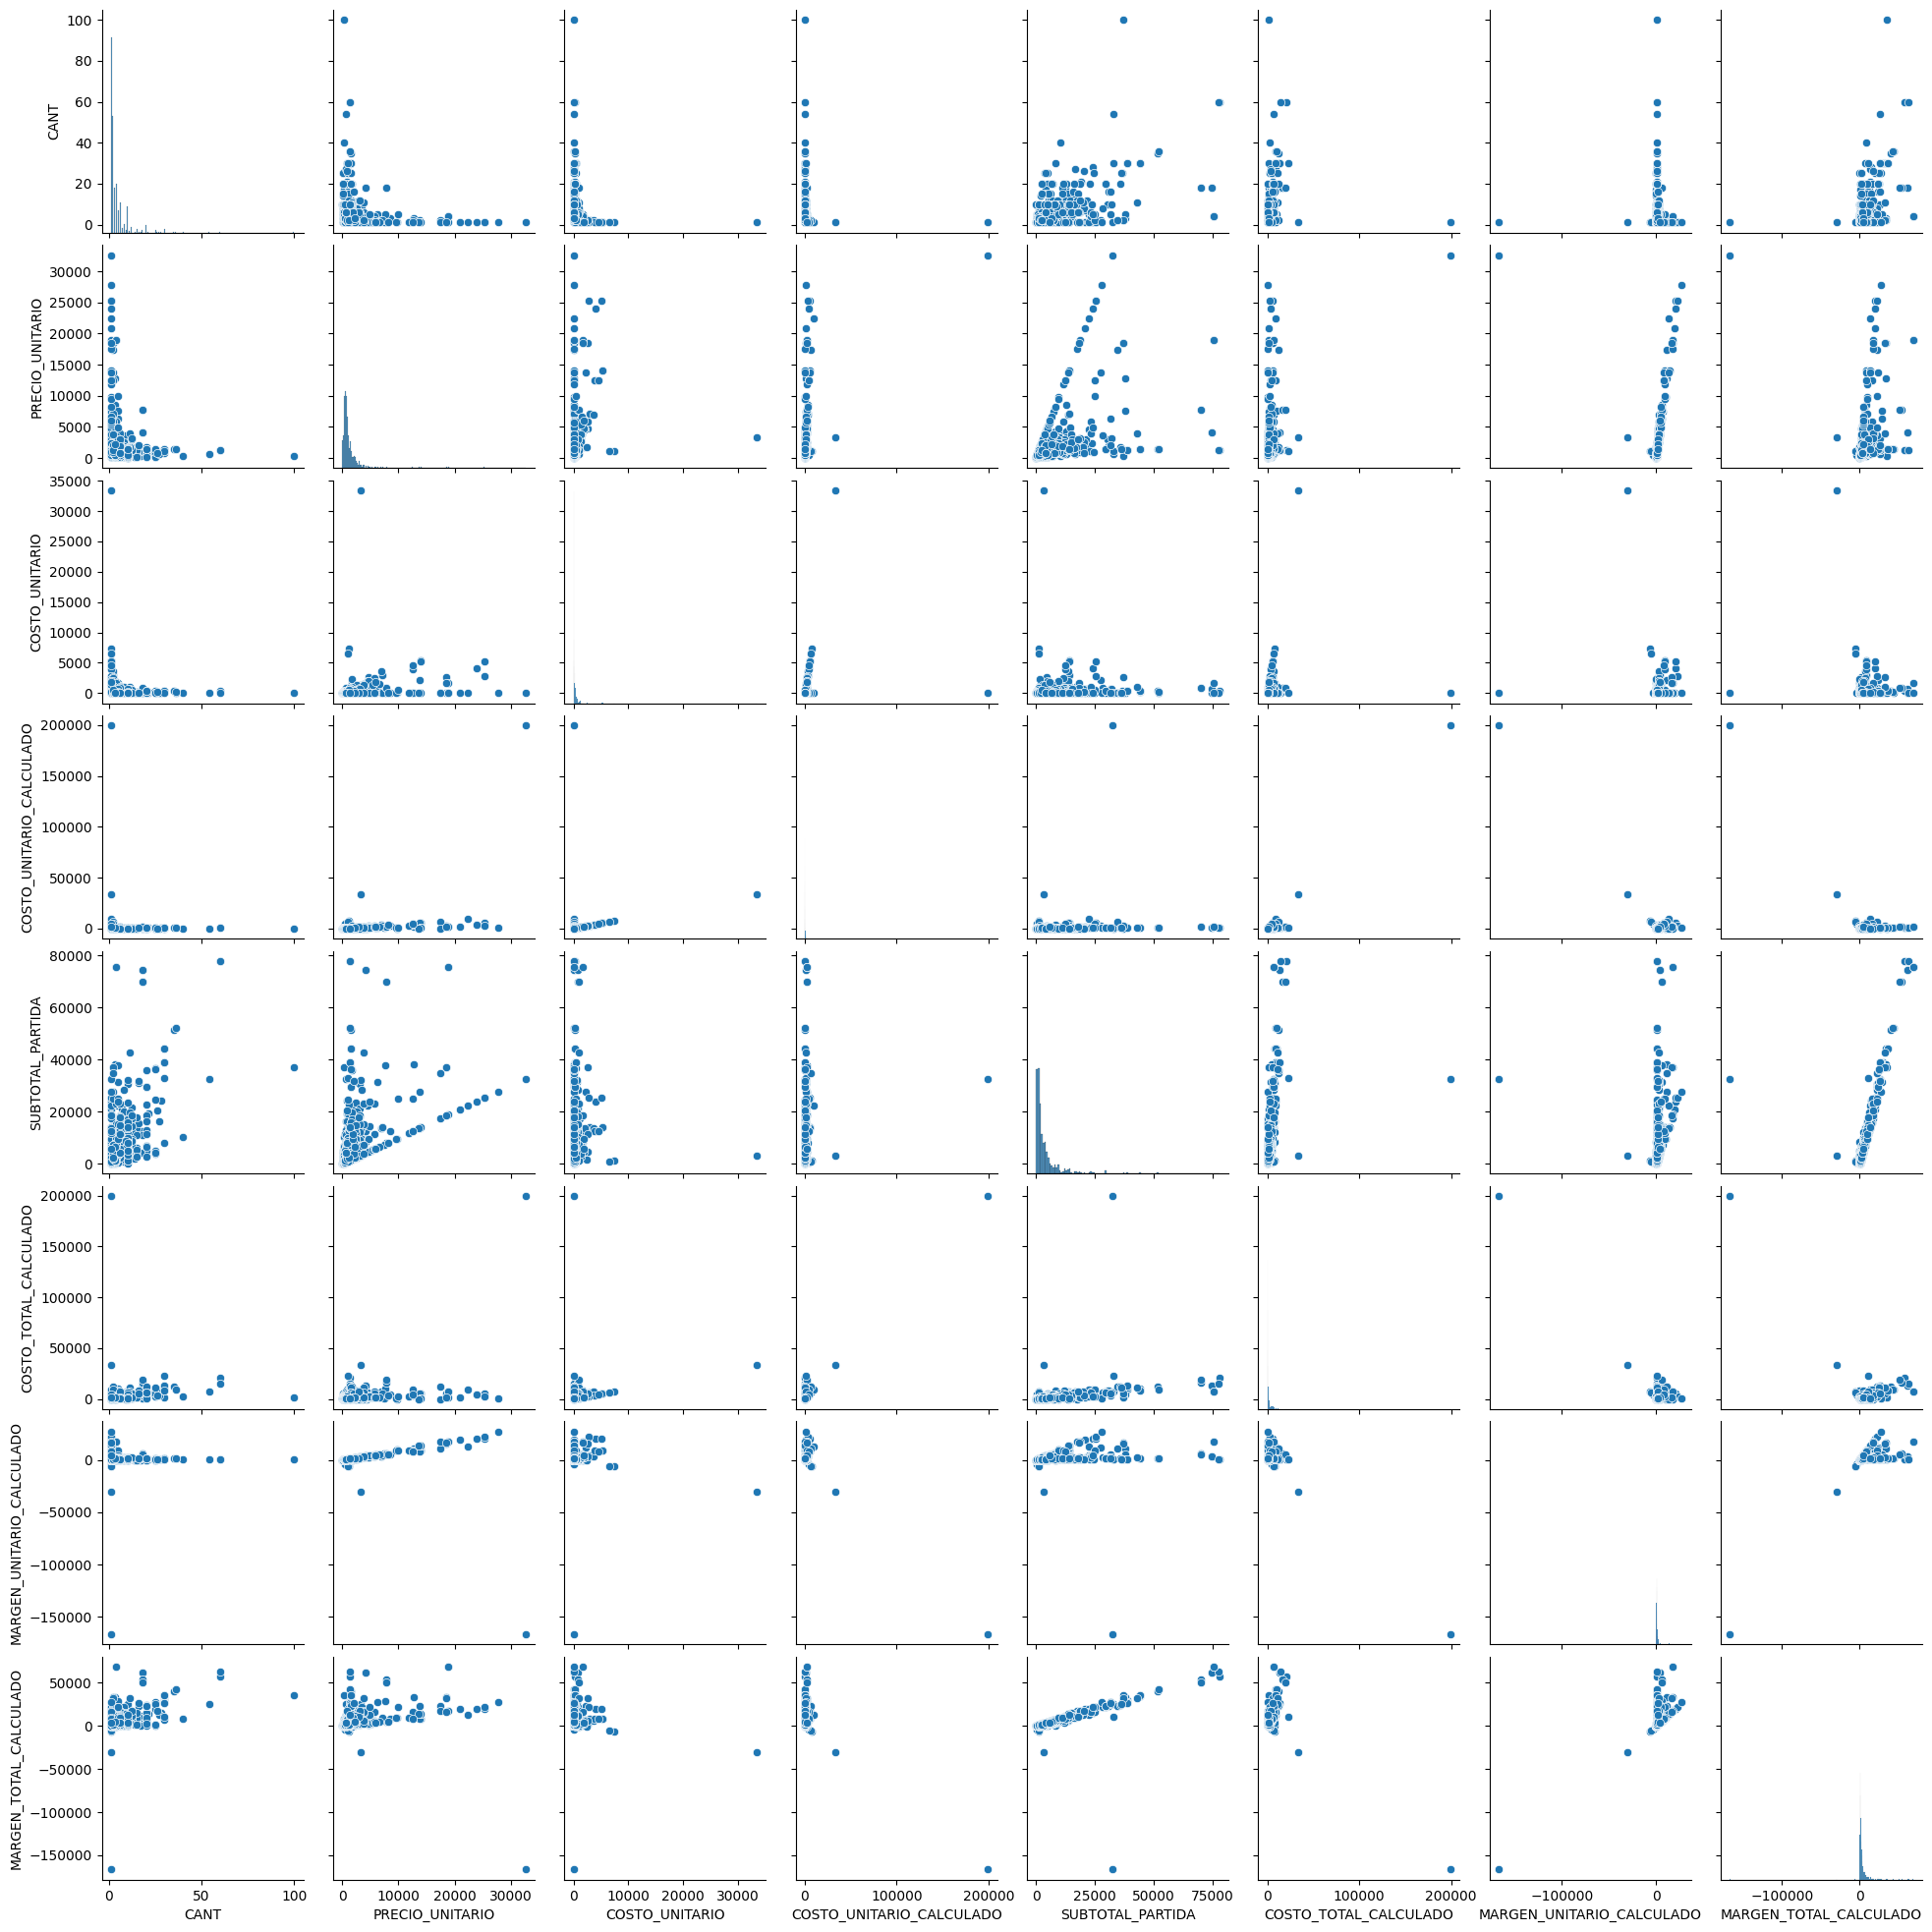

In [143]:
sns.pairplot(dfprecios)

Las gráficas mostradas previamente ilustran la relación entre las diversas columnas del documento "Detalle de precios". Como se puede observar, las columnas presentan un patrón que sugiere una posible relación, especialmente entre las columnas "MARGEN_TOTAL_CALCULADO" y "SUBTOTAL_PARTIDA". Este patrón, junto con la alta relevancia de la columna "MARGEN_TOTAL_CALCULADO" y su importancia para la empresa, fueron las razones principales para utilizar estas columnas en los siguientes modelos.

## ***Modeliza mediante por lo menos cuatro regresores (lineales y no-lineales) cuáles escenarios son los más favorables para la problemática.***

### **Modelo Quadratica - no lineal**

In [190]:
#df["IVA"]=df['IVA'].fillna(df['IVA'].mean())

In [191]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(df)

In [192]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= dfprecios[['SUBTOTAL_PARTIDA']]
Var_Dep= dfprecios[['MARGEN_TOTAL_CALCULADO']]

In [193]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c

            y = ax^3 + bx + c

            y = ax^3 + bx^2 + c

            y = a*exp(bx) + c

**MODELO 1**

In [194]:
def func1(x, a, b, c):
    return a * x**2 + b * x + c


In [195]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, dfprecios['SUBTOTAL_PARTIDA'], dfprecios['MARGEN_TOTAL_CALCULADO'])

In [196]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([2.34409789e-06, 6.25014975e-01, 2.21458376e+02])

In [197]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, dfprecios['SUBTOTAL_PARTIDA'], dfprecios['MARGEN_TOTAL_CALCULADO'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [198]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,SUBTOTAL_PARTIDA
0,493.457384
1,1015.254007
2,2669.771916
3,309.006417
4,437.261021
...,...
1421,2934.302096
1422,2959.849473
1423,4413.939758
1424,3997.067326


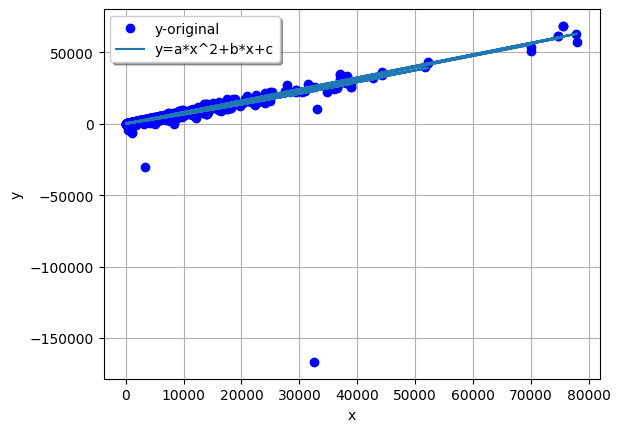

In [199]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [200]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.6085359561089572

### **Modelo Logarítmico - no lineal**

In [201]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= dfprecios[['SUBTOTAL_PARTIDA']]
Var_Dep= dfprecios['MARGEN_TOTAL_CALCULADO']

In [202]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [203]:
def func2(x, ln_a, b, c):
    return ln_a + b*x + np.log(np.abs(c - x))

In [204]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, dfprecios['SUBTOTAL_PARTIDA'], dfprecios['MARGEN_TOTAL_CALCULADO'])

In [205]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-1.25001605e+02,  7.39459233e-01, -1.77215635e+06])

In [206]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, dfprecios['SUBTOTAL_PARTIDA'], dfprecios['MARGEN_TOTAL_CALCULADO'])
ln_a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = ln_a2 +b2*x + np.log(np.abs(c2 - x))

In [207]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

,SUBTOTAL_PARTIDA
0,210.666595
1,824.100259
2,2744.654820
3,-7.089526
4,144.374025
...,...
1421,3048.358353
1422,3077.640961
1423,4730.666360
1424,4259.475184


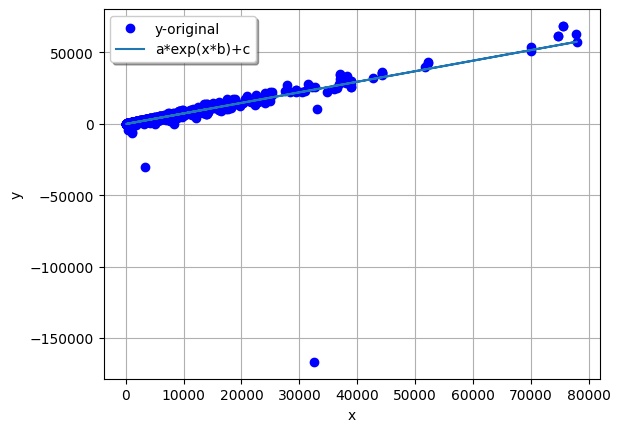

In [208]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [209]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

0.6048162872567583

El metodo quadratico obtuvo un r^2 de 0.6085, se trato de mejorar con el metodo logarítmico pero este obtuvo r^2 de 0.6048 el cuál empeoro ligeramente.


### **Regresion Logistica - linear**


El modelo no se considera optimo para este archivo ya que la mayoria de las columnas son numéricas. Además es necesario tener una variable dicotómica con la cual no se cuenta. Se consideró transdformar una columna como por ejemplo "NOMBRE_CLIENTE" y separarla en dos categorías, cliente grande y cliente pequeño las cuales serían filtradas en base al promedio de "PRECIO_UNITARIO". Arriba del promedio cliente grande y abajo cliente pequeño. Esto no tiene mucho sentido ya que algunos clientes se repiten y por lo tanto pueden ser categorizados en ambas clases, haciendo que este análisis no sea optimo para el documento presente.

## ***Genera una ANOVA e intervalos de confianza (describe todo el proceso)***

In [210]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(dfprecios['FECHA_DOC'])
unico

array(['2022-01-05T00:00:00.000000000', '2022-01-07T00:00:00.000000000',
       '2022-01-10T00:00:00.000000000', '2022-01-11T00:00:00.000000000',
       '2022-01-12T00:00:00.000000000', '2022-01-13T00:00:00.000000000',
       '2022-01-14T00:00:00.000000000', '2022-01-17T00:00:00.000000000',
       '2022-01-18T00:00:00.000000000', '2022-01-19T00:00:00.000000000',
       '2022-01-20T00:00:00.000000000', '2022-01-21T00:00:00.000000000',
       '2022-01-24T00:00:00.000000000', '2022-01-25T00:00:00.000000000',
       '2022-01-26T00:00:00.000000000', '2022-01-27T00:00:00.000000000',
       '2022-01-28T00:00:00.000000000', '2022-01-31T00:00:00.000000000',
       '2022-02-01T00:00:00.000000000', '2022-02-02T00:00:00.000000000',
       '2022-02-03T00:00:00.000000000', '2022-02-04T00:00:00.000000000',
       '2022-02-08T00:00:00.000000000', '2022-02-09T00:00:00.000000000',
       '2022-02-10T00:00:00.000000000', '2022-02-11T00:00:00.000000000',
       '2022-02-14T00:00:00.000000000', '2022-02-15

In [211]:
# Crear la nueva columna 'MES' con el nombre del mes correspondiente
dfprecios['MES'] = dfprecios['FECHA_DOC'].dt.month_name()

# Nombres en español
month_names = {
    'January': 'Enero',
    'February': 'Febrero',
    'March': 'Marzo',
    'April': 'Abril',
    'May': 'Mayo',
    'June': 'Junio',
    'July': 'Julio',
    'August': 'Agosto',
    'September': 'Septiembre',
    'October': 'Octubre',
    'November': 'Noviembre',
    'December': 'Diciembre'
}


# Mes en español
dfprecios['MES'] = dfprecios['MES'].map(month_names)

dfprecios.head()

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO,MES
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68,Enero
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87,Enero
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56,Enero
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,1,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04,Enero
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41,Enero


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Abril'),
  Text(2, 0, 'Agosto'),
  Text(3, 0, 'Diciembre'),
  Text(4, 0, 'Enero'),
  Text(5, 0, 'Febrero'),
  Text(6, 0, 'Julio'),
  Text(7, 0, 'Junio'),
  Text(8, 0, 'Marzo'),
  Text(9, 0, 'Mayo'),
  Text(10, 0, 'Noviembre'),
  Text(11, 0, 'Octubre'),
  Text(12, 0, 'Septiembre')])

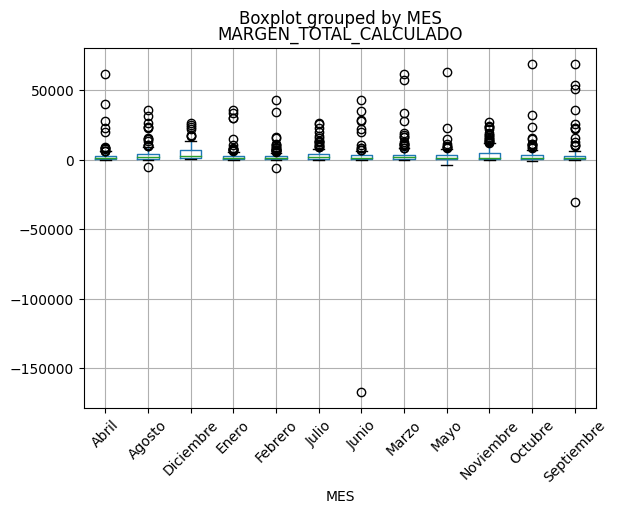

In [212]:
dfprecios.boxplot("MARGEN_TOTAL_CALCULADO", by= "MES")

#Rotación de ejes
plt.xticks(rotation=45)

In [213]:
grupos=pd.unique(dfprecios['MARGEN_TOTAL_CALCULADO'].values)
grupos

array([  381.68,   936.87,  2617.56, ...,  3683.48,  4757.41, 13253.45])

**SCIPY ONEWAY (ANOVA)**

In [216]:
#Defino grupos donde me entrega la columna Fare separada por grupos de las 
#categorías de la columna sex: "male" y "female" 
filtro1 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Enero']
filtro2 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Febrero']
filtro3 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Marzo']
filtro4 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Abril']
filtro5 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Mayo']
filtro6 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Junio']
filtro7 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Julio']
filtro8 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Agosto']
filtro9 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Septiembre']
filtro10 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Octubre']
filtro11 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Noviembre']
filtro12 = dfprecios.MARGEN_TOTAL_CALCULADO[dfprecios.MES == 'Diciembre']


In [217]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable cuantitativa
anova = stats.f_oneway(filtro1, filtro2, filtro3, filtro4, filtro5, filtro6, filtro7, filtro8, filtro9, filtro10, filtro11, filtro12)
anova

F_onewayResult(statistic=1.1449567403630583, pvalue=0.32175654650678354)

El pvalue es de más del 30%, lo que significa que no hay variación del margen total calculado con respecto al mes.